In [54]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [55]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [56]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_DA['job_posted_month'] = df_DA['job_posted_date'].dt.month_name()
df_DA['job_posted_month'] = pd.Categorical(df_DA['job_posted_month'], categories=month_order, ordered=True)


In [57]:
df_DA_explode = df_DA.explode(column='job_skills').copy()

In [58]:
df_DA_pivot = df_DA_explode.pivot_table(
    index='job_posted_month', 
    columns='job_skills', 
    aggfunc='size', 
    fill_value=0).copy()

C:\Users\Seven\AppData\Local\Temp\ipykernel_13900\4201223753.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_DA_pivot = df_DA_explode.pivot_table(


<Axes: xlabel='job_posted_month'>

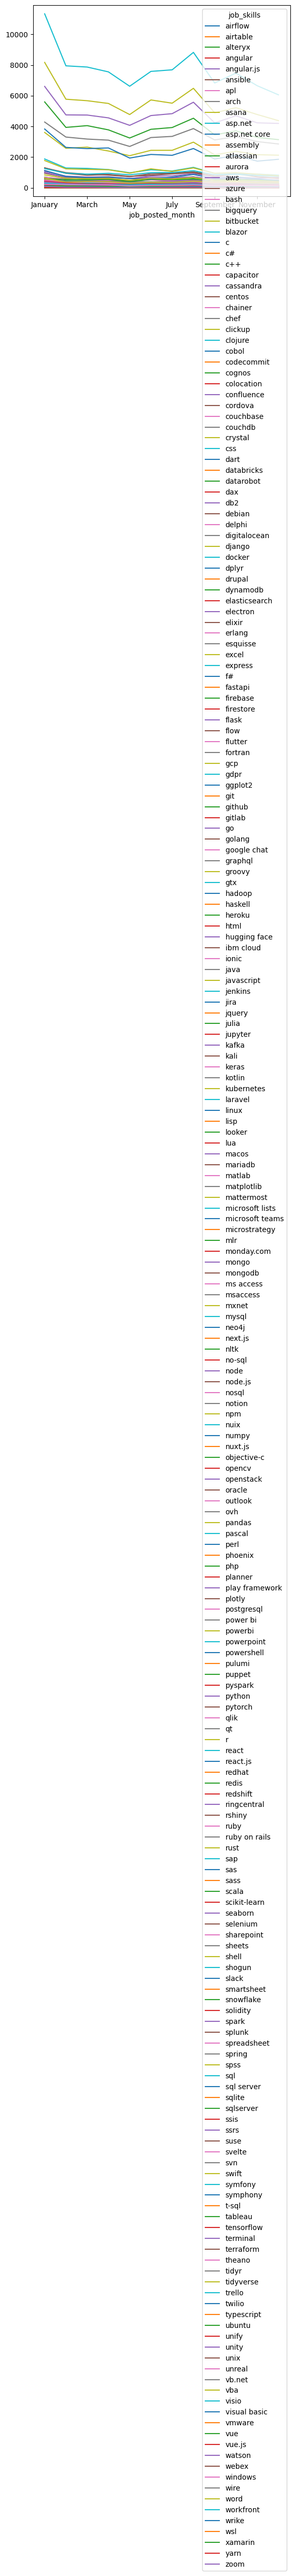

In [59]:
df_DA_pivot.plot(kind='line')

In [60]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

In [61]:
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot = df_DA_pivot.drop(labels='Total')

df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
February,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
March,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
April,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
June,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
July,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
August,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
September,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


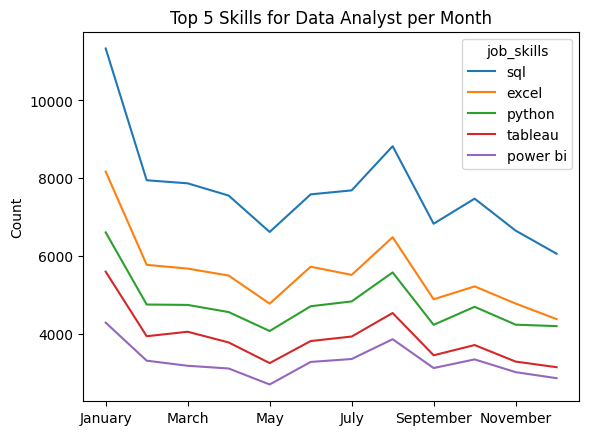

In [62]:
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Analyst per Month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()